<a href="https://colab.research.google.com/github/Sirilak-1447/ImageProcessing/blob/main/Khim_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**660510777 Sirilak Srichaichana (Khim) 0986655541**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests

In [ ]:
folder_path = '/content/drive/MyDrive/Khim_imageclass/'
img_bgr = cv2.imread(folder_path + 'Khim2.jpg' )
if img_bgr is None:
    print('Error:Image load failed')
    sys.exit()

**Convert to Gray and Plot its Histogram**

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

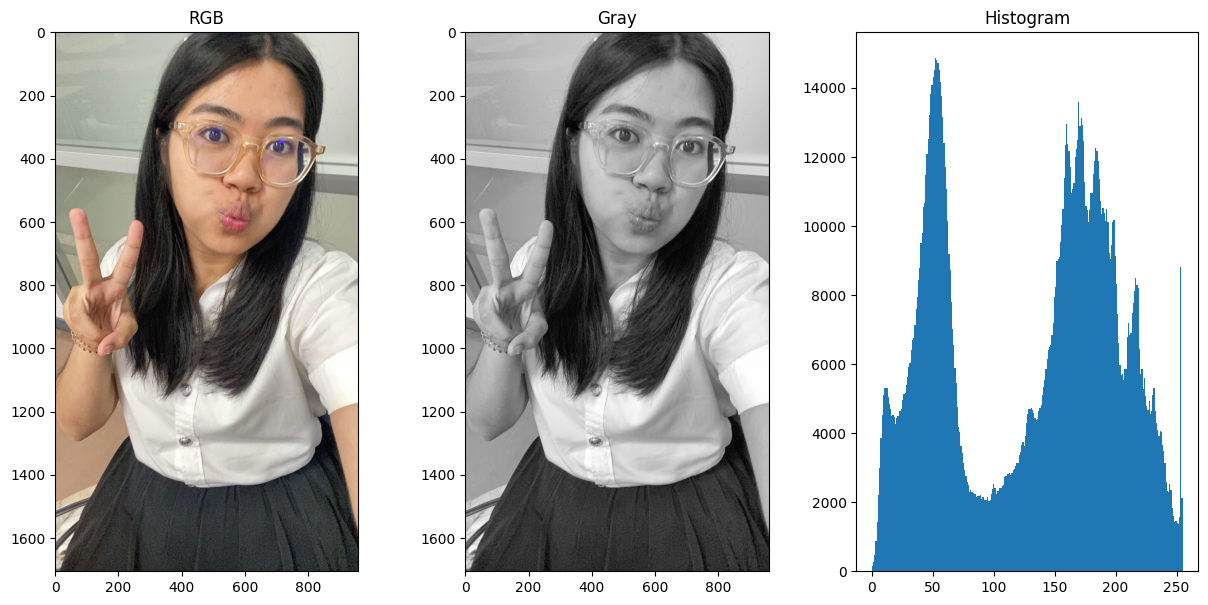

In [ ]:
fig = plt.figure(figsize=(15, 7))  # (W, H) in inches
rows = 1
cols = 3
index = 1

plt.subplot(rows, cols, index); index += 1
plt.imshow(img_rgb)
plt.title('RGB')

plt.subplot(rows, cols, index); index += 1
plt.imshow(img_gray, cmap='gray')
plt.title('Gray')

img_flat = img_gray[:,:].flatten()
hist,bins = np.histogram(img_flat,bins= 256,range= [0,256])
plt.subplot(rows, cols, index); index += 1
plt.hist(img_gray.ravel(), bins=256)
plt.title('Histogram')

plt.show()

#fig.savefig(folder_path + 'Khim_imageclass.jpg')

**Binarize the Gray Image Using a Threshold**

In [ ]:
retval, img_bin = cv2.threshold(img_gray, thresh=150, maxval=255, type=cv2.THRESH_BINARY)
print(f'Threshold value = {retval}')

Threshold value = 150.0


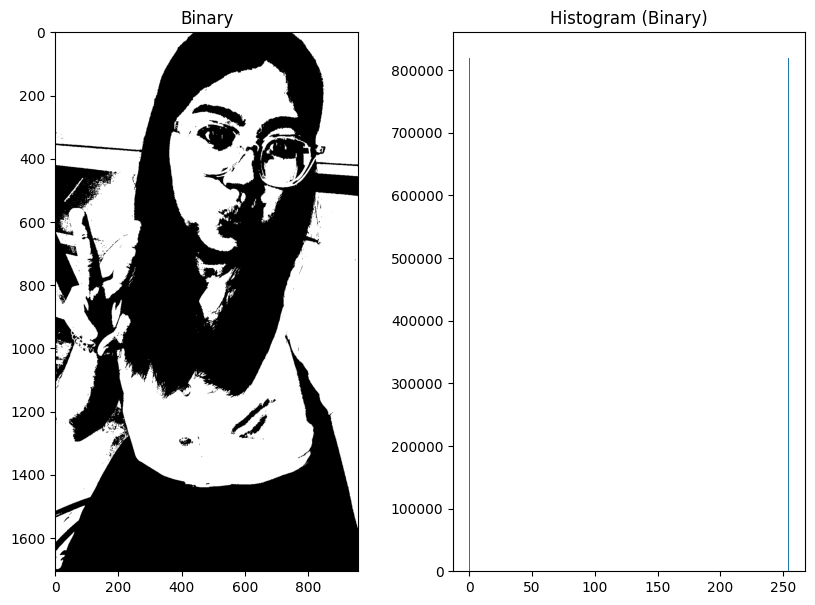

In [ ]:
# Plot Binary image and its Histogram
fig = plt.figure(figsize=(10, 7))  # (W, H) in inches
rows = 1
cols = 2
index = 1

plt.subplot(rows, cols, index); index += 1
plt.imshow(img_bin, cmap='gray')
plt.title('Binary')

img_flat_bin = img_bin.flatten()  # Convert 2D array to 1D array
hist, bins = np.histogram(img_flat_bin, bins=256, range=(0, 255))

plt.subplot(rows, cols, index); index += 1
plt.hist(bins[:-1], bins, weights=hist)
plt.title('Histogram (Binary)')

plt.show()



**Distance Transform**

In [ ]:
dist = cv2.distanceTransform(img_bin, distanceType=cv2.DIST_L2, maskSize=3)  # Use Euclidean distance

# Normalize the distance image for display
dist_norm = cv2.normalize(src=dist, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

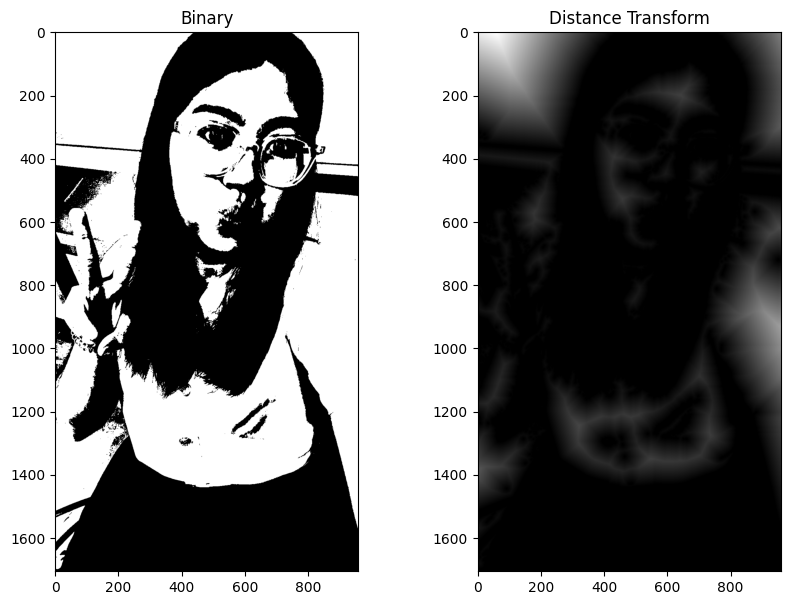

In [ ]:
fig = plt.figure(figsize=(10, 7))  # (W, H) in inches
rows = 1
cols = 2
index = 1

plt.subplot(rows, cols, index); index += 1
plt.imshow(img_bin, cmap='gray')
plt.title('Binary')

plt.subplot(rows, cols, index); index += 1
plt.imshow(dist_norm, cmap='gray')
plt.title('Distance Transform')

plt.show()

**Try a Segmemtation**

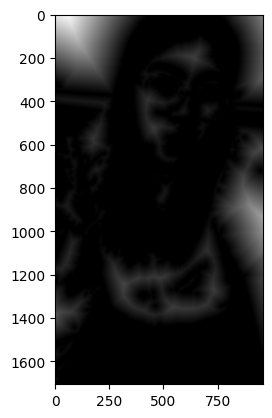

In [ ]:
from PIL import Image

pil_dist = Image.fromarray(np.uint8(dist_norm * 255))
plt.imshow(pil_dist, cmap='gray')
pil_dist.save(folder_path + 'Khim_2.jpg')

In [ ]:
# 1. Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

folder_path = '/content/drive/MyDrive/Khim_imageclass/'


# 2. Load Image
image =  cv2.imread(folder_path + 'Khim2.jpg' )  # หรือ 'Jeep.jpg'
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


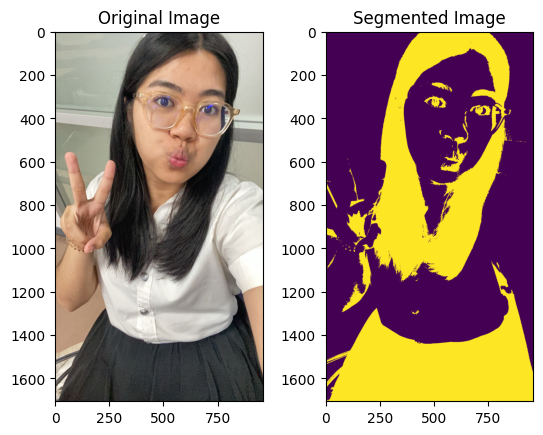

In [ ]:
# Reshape to 2D Array: (H, W, 3) → (H*W, 3)
pixels = image.reshape((-1, 3))  # -1 = ให้หา row เองตาม pixel ทั้งหมด

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # ลองเปลี่ยนเป็น 6, 3, หรือ 2
labels = kmeans.fit_predict(pixels)
segmented_image = labels.reshape(image.shape[:2])

# Display Results
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap="viridis")
plt.title("Segmented Image")

plt.show()

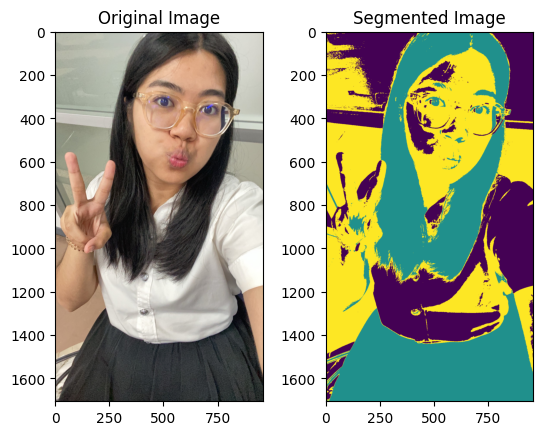

In [ ]:
# Reshape to 2D Array: (H, W, 3) → (H*W, 3)
pixels = image.reshape((-1, 3))  # -1 = ให้หา row เองตาม pixel ทั้งหมด

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # ลองเปลี่ยนเป็น 6, 3, หรือ 2
labels = kmeans.fit_predict(pixels)
segmented_image = labels.reshape(image.shape[:2])

# Display Results
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap="viridis")
plt.title("Segmented Image")

plt.show()

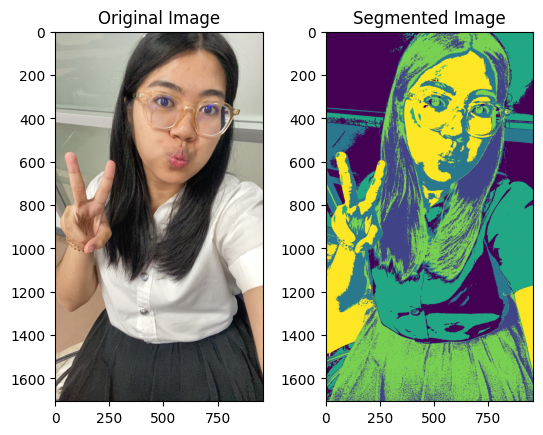

In [ ]:
# Reshape to 2D Array: (H, W, 3) → (H*W, 3)
pixels = image.reshape((-1, 3))  # -1 = ให้หา row เองตาม pixel ทั้งหมด

# Apply K-Means
kmeans = KMeans(n_clusters=6, random_state=42)  # ลองเปลี่ยนเป็น 6, 3, หรือ 2
labels = kmeans.fit_predict(pixels)
segmented_image = labels.reshape(image.shape[:2])

# Display Results
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap="viridis")
plt.title("Segmented Image")

plt.show()